<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 8</b></center>    
<pre>    

# Step 1: Import Libraries
This step imports all necessary libraries for data processing, visualization, and machine learning.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load the Dataset
Load Given dataset -  heart.csv

In [32]:
df = pd.read_csv("heart.csv")


# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [33]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

# Step 4: Univariate Analysis
Here we visualize the distribution of each feature using histograms.

<Figure size 1200x600 with 0 Axes>

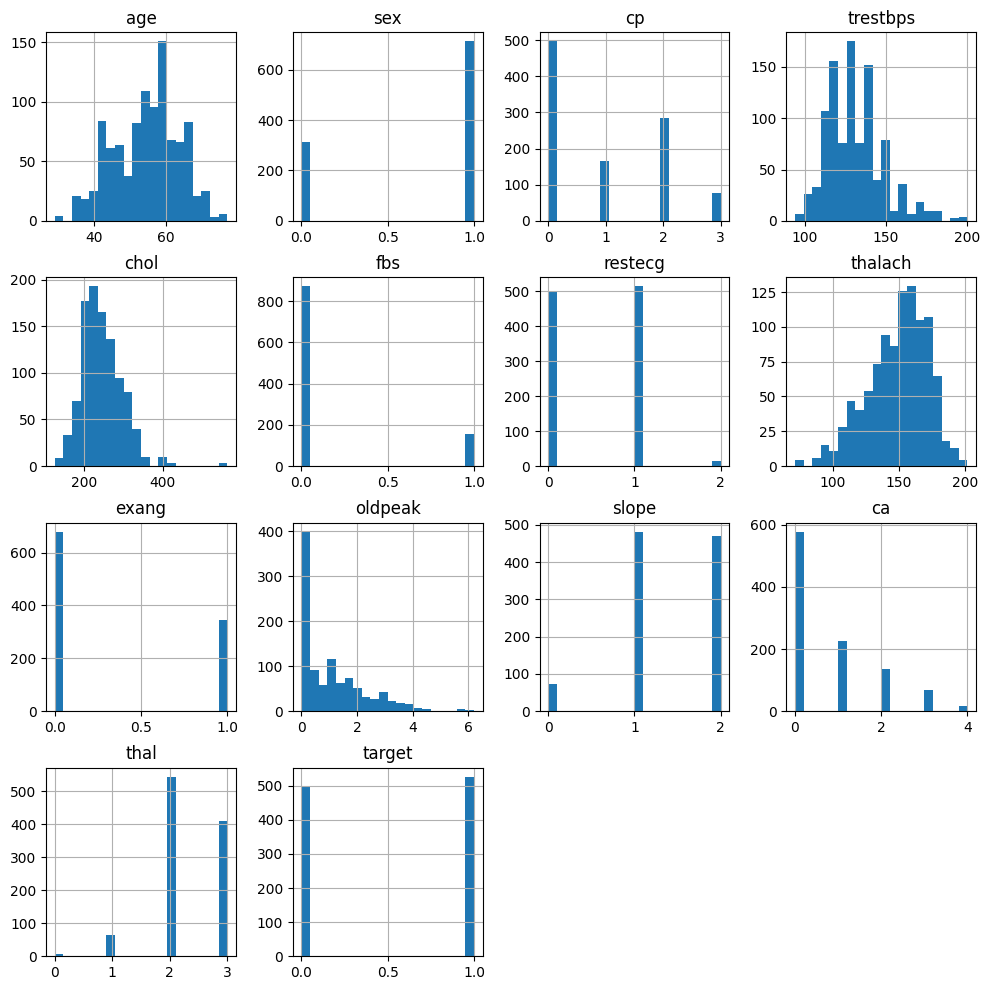

In [34]:
plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 12), bins=20)
plt.show()

# Step 5: Bivariate Analysis
This step involves exploring the correlations between features using a heatmap.

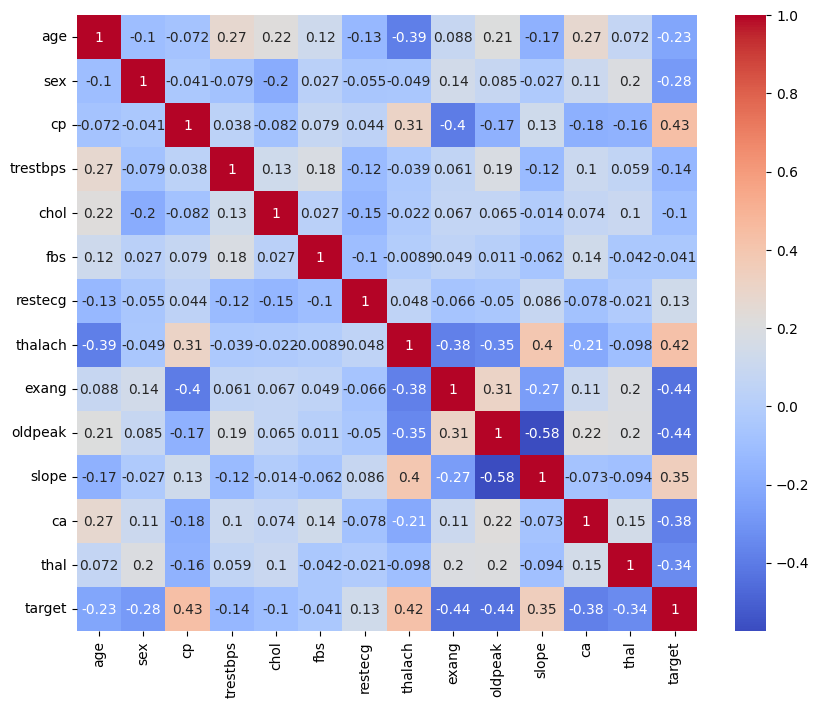

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Step 6: Outlier Detection
We visualize potential outliers using boxplots.

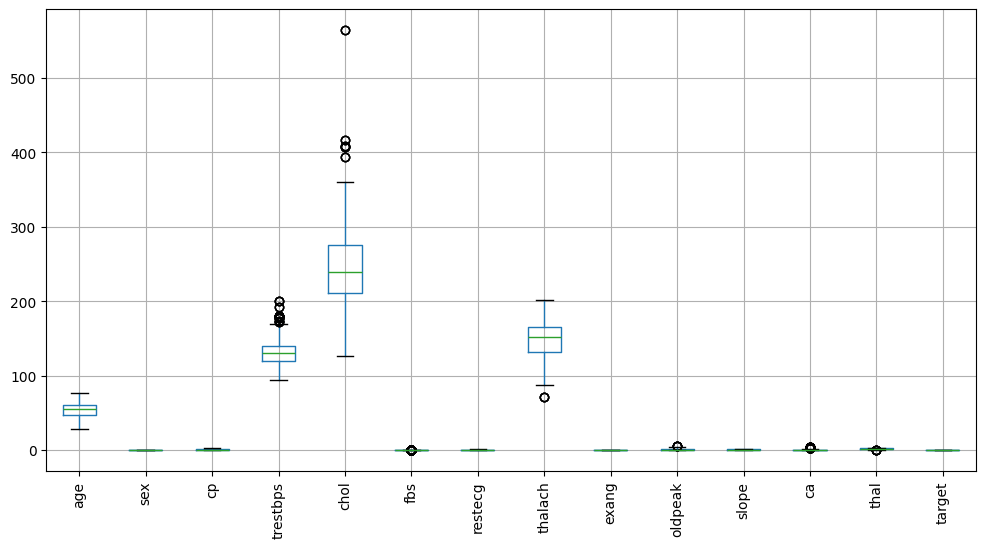

In [36]:
plt.figure(figsize=(12, 6))
df.boxplot(rot=90)
plt.show()

# Step 7: Split Data into Training and Testing Sets
The dataset is split into training and testing sets for model evaluation.

In [37]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train Decision Tree
We train a Decision Tree Classifier on the training data. You have to also check for KNeighborsClassifier and  GaussianNB

In [38]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)





DecisionTreeClassifier()

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

# Step 9: Evaluate Decision Tree
We evaluate the Decision Tree model using accuracy, confusion matrix, and classification report.

In [41]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

[[102   0]
 [  3 100]]


# Step 10: Visualize Decision Tree
Here we visualize the structure of the trained Decision Tree.

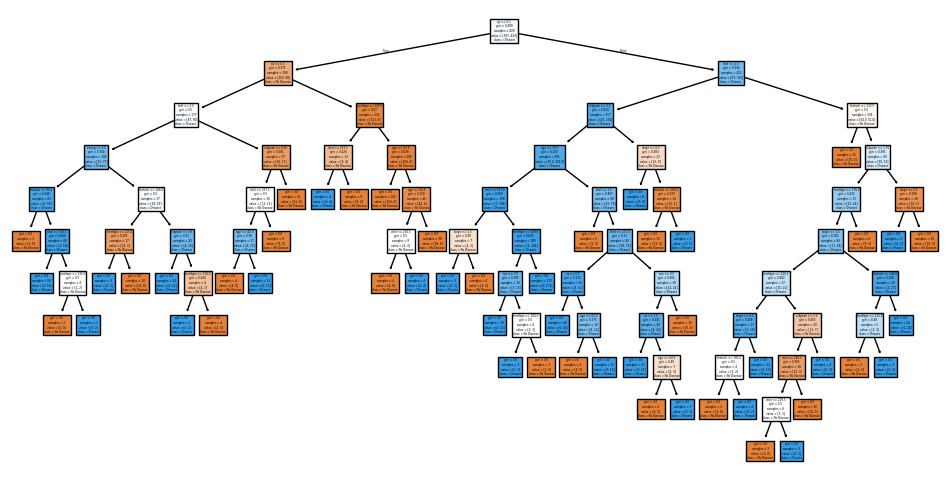

In [42]:
plt.figure(figsize=(12, 6))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.show()

# Step 11: Train Bagging Classifier
We train a Bagging Classifier with Decision Trees as the base model.

In [43]:
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)
bagging.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

# Step 12: Evaluate Bagging Classifier
The Bagging model is evaluated using accuracy.

In [44]:
y_pred_bagging = bagging.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))

Bagging Accuracy: 0.9853658536585366


# Step 13: Train Random Forest
We train a Random Forest Classifier on the dataset.

In [45]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

# Step 14: Feature Importance in Random Forest
We analyze feature importance as determined by the Random Forest model.

In [46]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)


cp          0.138830
oldpeak     0.121113
ca          0.119975
thalach     0.115749
thal        0.115394
age         0.082365
chol        0.081939
trestbps    0.073024
slope       0.052146
exang       0.040981
sex         0.032803
restecg     0.017394
fbs         0.008290
dtype: float64


# Step 15: Evaluate Random Forest
We evaluate the Random Forest model using accuracy.

In [47]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366


# Step 16: Train AdaBoost Classifier
We train an AdaBoost Classifier on the dataset.

In [48]:
adaboost = AdaBoostClassifier(n_estimators=50)
adaboost.fit(X_train, y_train)


c:\Users\renis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

# Step 17: Evaluate AdaBoost Classifier
The AdaBoost model is evaluated using accuracy.

In [49]:
y_pred_ada = adaboost.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))


AdaBoost Accuracy: 0.8780487804878049
